In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

D:\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
def elapsed(sec):
    if sec < 60:
        return "{:.2f}".format(sec) + " sec"
    elif sec < (60 * 60):
        return "{:.2f}".format(sec / 60) + " min"
    else:
        return "{:.2f}".format(sec / (60 * 60)) + " hr"

In [3]:
def showimg(img):
    plt.figure("Image")
    plt.imshow(img,cmap='gray')
    plt.axis('on')
    plt.title('image')
    plt.show()

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
HIDDEN_SIZE=128
INPUT_SIZE=787
INPUT_NUMBER=128
LAYER_NUMBER=4

In [6]:
def make_layer(INPUT_SIZE,HIDDEN_SIZE,LAYER_NUMBER):
    x = tf.placeholder(tf.float32, [None, INPUT_SIZE])
    weights={'W0':tf.Variable(tf.truncated_normal([INPUT_SIZE, HIDDEN_SIZE], stddev=0.1))}
    bias={'b0':tf.Variable(tf.constant(0.1, shape=[HIDDEN_SIZE]))}
    a={'a0':tf.nn.tanh(tf.matmul(x, weights['W0']) + bias['b0'])}
    for i in range(1,LAYER_NUMBER+1):
        weights['W'+str(i)] = tf.Variable(tf.truncated_normal([HIDDEN_SIZE, HIDDEN_SIZE], stddev=0.1))
        bias['b' + str(i)] = tf.Variable(tf.constant(0.1, shape=[HIDDEN_SIZE]))
        a['a' + str(i)] = tf.nn.tanh(tf.matmul(a['a' + str(i-1)],weights['W'+str(i)]) + bias['b' + str(i)])

    weights['W' + str(LAYER_NUMBER+1)] = tf.Variable(tf.truncated_normal([HIDDEN_SIZE, 784], stddev=0.1))
    bias['b' + str(LAYER_NUMBER+1)] = tf.Variable(tf.constant(0.1, shape=[784]))
    y = tf.nn.sigmoid(tf.matmul(a['a' + str(LAYER_NUMBER)],weights['W'+str(LAYER_NUMBER+1)])
                      + bias['b' + str(LAYER_NUMBER+1)])
    return x,y 
x,y=make_layer(INPUT_SIZE,HIDDEN_SIZE,LAYER_NUMBER)

In [7]:
def make_index(NUM,INPUT_SIZE):
    l=np.array([])
    for i in range(NUM):
        p=np.zeros((INPUT_SIZE))
        b=bin(i)[2:]
        _=len(b)-1
        for k in b:
            p[_]=k
            _-=1
        l=np.append(l,p)
    return l.reshape(-1,INPUT_SIZE)

In [8]:
labels=tf.placeholder(tf.float32, [None, 784])
loss=tf.losses.mean_squared_error(labels,y)
train_step = tf.train.AdamOptimizer(0.00001).minimize(loss)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [9]:
batch_xs, batch_ys = mnist.train.next_batch(INPUT_NUMBER)
inp=[]
tran=[]
ind=np.zeros(3)
for i in range(len(batch_xs)):
    t_=batch_xs[i].reshape(28,28)
    t_=t_.reshape(-1)
    tran.append(t_)
    z=ind
    z[0]=1
    inp_=np.append(batch_xs[i],z)
    inp.append(inp_)
for i in range(len(batch_xs)):
    t_=batch_xs[i][::-1].reshape(28,28)
    t_=t_.reshape(-1)
    tran.append(t_)
    z=ind
    z[1]=1
    inp_=np.append(batch_xs[i],z)
    inp.append(inp_)
for i in range(len(batch_xs)):
    t_=batch_xs[i][::-1].reshape(28,28).T
    t_=t_.reshape(-1)
    tran.append(t_)
    z=ind
    z[2]=1
    inp_=np.append(batch_xs[i],z)
    inp.append(inp_)
inp=np.array(inp)
tran=np.array(tran)
print(inp.shape)
print(tran.shape)


(384, 787)
(384, 784)


In [10]:

cost=1
i=0
start_time=time.time()
while cost>0.0001:
    unuse,cost=sess.run([train_step,loss],feed_dict={x:inp,labels:tran})
    if i % 1000==0:
        print(cost)
    i+=1
print('ITERATION:'+str(i))
print("Elapsed time: ", elapsed(time.time() - start_time))

0.25461763
0.111564
0.081597604
0.075536504
0.07370645
0.072967656
0.07261606
0.07228473
0.06624224
0.060207095
0.054171525
0.048205778
0.044592697
0.040887594
0.03752676
0.034540188
0.031630255
0.028714683
0.025936604
0.023366172
0.020987956
0.018786578
0.01680768
0.015022394
0.013419616
0.011971377
0.010668508
0.009493645
0.008439116
0.0074944156
0.0066483663
0.0058912463
0.0052183657
0.004619428
0.004087388
0.0036163807
0.0031999678
0.002831419
0.0025034712
0.002215221
0.001959973
0.0017334963
0.0015361257
0.0013625633
0.0012095983
0.0010747382
0.00095576607
0.00085110945
0.0007592168
0.0006783603
0.00060773373
0.00054550974
0.00049023615
0.0004408834
0.00039817722
0.00036060103
0.00032740654
0.0002981896
0.0002719778
0.00024913516
0.0002290534
0.00021106841
0.00019507243
0.00018100836
0.00016838731
0.00015710632
0.00014445602
0.00012998824
0.00012093894
0.000113428956
0.000106732725
0.00010034181
ITERATION:71057
Elapsed time:  5.96 min


In [17]:
newimg,lb=mnist.test.next_batch(1)
newimg=newimg.reshape(-1)

newimg:


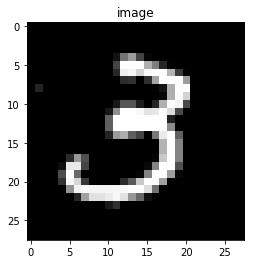

GROUND TRUTH1:


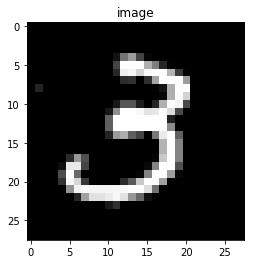

TRANS1:


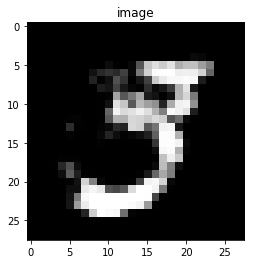

GROUND TRUTH2:


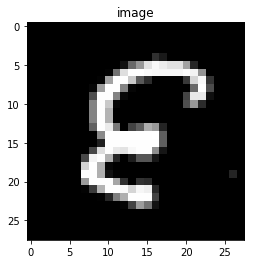

TRANS2:


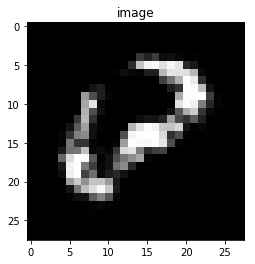

GROUND TRUTH3:


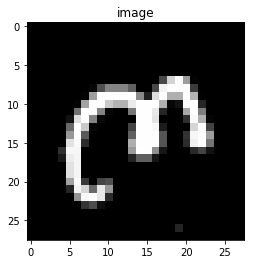

TRANS3:


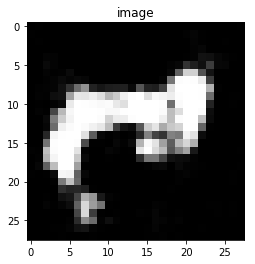

In [18]:
z=np.zeros(3)
print('newimg:')
showimg(newimg.reshape(28,28))
print('GROUND TRUTH1:')
showimg(newimg.reshape(28,28))
print('TRANS1:')
k=z
k[0]=1
inpt=np.append(newimg,k).reshape(1,-1)
oupt=sess.run(y,feed_dict={x:inpt})
showimg(oupt.reshape(28,28))
print('GROUND TRUTH2:')
newimg1=newimg[::-1].reshape(28,28)
newimg1=newimg1.reshape(-1)
showimg(newimg1.reshape(28,28))
print('TRANS2:')
k=z
k[1]=1
inpt=np.append(newimg,k).reshape(1,-1)
oupt=sess.run(y,feed_dict={x:inpt})
showimg(oupt.reshape(28,28))
print('GROUND TRUTH3:')
showimg(newimg[::-1].reshape(28,28).T)
print('TRANS3:')
k=z
k[2]=1
inpt=np.append(newimg,k).reshape(1,-1)
oupt=sess.run(y,feed_dict={x:inpt})
showimg(oupt.reshape(28,28))

In [13]:
inpt=inp[0]
inpt.shape

(787,)

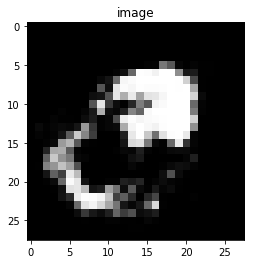

In [14]:
inpt=inpt.reshape(-1)
inpt[-1]=1
inpt=inpt.reshape(1,-1)
oupt=sess.run(y,feed_dict={x:inpt})
showimg(oupt.reshape(28,28))

In [15]:
inpt[-1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

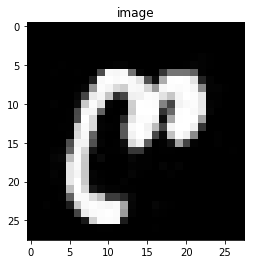

In [16]:
oupt=sess.run(y,feed_dict={x:inp[256].reshape(1,-1)})
showimg(oupt.reshape(28,28))